# Curs 6 - modele de clasificare

## Machine learning

Machine learning (ML) vizeaza extragerea de cunostinte din date, intr-un mod -- deocamdata -- semiautomat. Punctul de plecare este un set de date:
* achizitiile facute de clientii unei anumite afaceri
* paginile unui site prin care s-au plimbat vizitatorii
* datele furnizate de senzori
* rating-urile date filmelor de catre cinefili
* texte (e.g. mesaje email) impreuna cu categoriile din care fac parte: mailuri de tip stiri, de pe retele sociale, legate de munca, spam etc.
* imagini catalogate (etichetate), gen [ImageNet](http://www.image-net.org), [Pascal VOC](http://host.robots.ox.ac.uk/pascal/VOC/) sau [Google-Landmarks: A New Dataset and Challenge for Landmark Recognition](https://research.googleblog.com/2018/03/google-landmarks-new-dataset-and.html)
* date medicale anonimizate
* inregistrari video in care se cere recunoasterea si localizarea de obiecte

Un exemplu de depozit de date frecvent utilizat de cercetatori este [UCI Machine Learning repository](http://archive.ics.uci.edu/ml/datasets.php). O lista ampla se gaseste la [Awesome Public Datasets](https://github.com/awesomedata/awesome-public-datasets), [Wikipedia](https://en.wikipedia.org/wiki/List_of_datasets_for_machine_learning_research), [aici](https://blog.algorithmia.com/machine-learning-datasets-for-data-scientists/), [aici](http://homepages.inf.ed.ac.uk/rbf/IAPR/researchers/MLPAGES/mldat.htm) sau [aici](https://storage.googleapis.com/openimages/web/index.html). 

Exista posibilitatea de a partaja si descarca seturi de date prin [Academic torrents](http://academictorrents.com), ![Academic torrents](./images/academic_torrents.png)

De exemplu, pornindu-se de la diferite emailuri, care au fost etichetate de utilizator drept spam sau non-spam, se doreste construirea unui clasificator automat care pe viitor sa faca sortarea automata a mesajelor. Modelul rezulta in urma determinarii unor relatii intre cuvintele care apar (sau nu) in mailuri si clasa fiecarui email. 

![Nigerian spam email](./images/nigerian_scam.png)



## Tipuri de invatare in ML

1. Invatarea supervizata: setul de instruire contine perechi de forma $(intrare, iesire\_asociata)$, de exemplu perechi (continut_email, tip_email) sau (caracteristici_masina, consum_carburant_100km). Observam ca iesirea poate fi discreta (spam sau nonspam, articol de tip politica, sport, stiri externe, mondene) sau continua (consum de carburant, presiune prezisa, viteza a unui obiect estimata etc.) Scopul este de a se prezice valoarea (reala sau dintr-o multime predefinita de clase) pentru o intrare data (de exemplu, o imagine sau o un sir de masuratori).
![Imagenet](./images/imagenet.png)
1. Invatare nesupervizata:datele se grupeaza natural pe baza similaritatilor (clustering, de exemplu segmentarea pietei), sau se face analiza de asocieri -- cine cumpara bere are tendinta de a cumpara si covrigei, evenimentul X este deseori si la scurt timp urmat de evenimentul Y, analiza componentelor independente etc.
![Imagenet](./images/clustering.png)
![MBA](./images/mba.jpg)
![ICA party problem](./images/cocktail-party-problem-n.jpg)
1. Invatarea prin intarire (reinforcement learning), in care se urmareste maximizarea unei recompense obtinuta dupa o serie de pasi. 
![Reinforcement learning](./images/reinforcementLearning.png) Sursa: Wikipedia

Modelul este construit pe baza setului de date. Scopul nu este de a invata "pe dinafara" setul de antrenare, ci de a construi modele care pot generaliza, adica pot produce o iesire buna pentru obiecte pe care nu le-au folosit pentru invatare, dar sunt suficient de similare cu acestea -- e.g. sa recunoasca pisici in poze, altele decat cele din setul de instruire.

## Biblioteca Scikit-learn

Biblioteca [Scikit-learn](https://scikit-learn.org/stable/) (sau sklearn) contine algoritmi de ML ce acopera partea de clasificare, regresie, estimare de probabilitate conditionata, outlier detection, cuantificarea performantelor modelelor, optimizare de hiperparametri, preprocesare s.a. Interfata expusa de clase este consistenta, iar trecerea de la un model la altul - in cadrul aceluiasi tip de invatare - este simpla.

Biblioteca sklearn este inclusa in distributia Anaconda. Alternativ, se poate instala via `conda`:
```
conda install scikit-learn
```
sau cu `pip`:
```
pip install scikit-learn
```
Actualizarea la ultima versiune se face prin:
```
conda update scikit-learn
```
respectiv
```
pip install scikit-learn --upgrade
```
La momentul scrierii acestui material, versiunea de sklearn este:

In [1]:
import sklearn
sklearn.__version__

# '1.1.3'

'1.1.3'

## Setul de date Iris

Un set frecvent folosit pentru demonstrarea diferitilor algoritmi de ML este [Iris](http://archive.ics.uci.edu/ml/datasets/Iris), de genul unui 'Hello world' la nivel de set de date de invatare si testare. Setul de date contine masuratori pentru 3 specii de floare Iris: Iris setosa, Iris Viginica, Iris versicolor. 

![Iris](./images/iris_flowers.png)

Pentru fiecare specie sunt cate 50 de flori masurate. Masuratorile sunt facute pentru 4 trasaturi:

1. lungimea sepalei in cm 
2. latimea sepalei in cm 
3. lungimea petalei in cm 
4. latimea petalei in cm 

![Petale si sepale](./images/iris_petalSepal.png)

Se poate descarca setul de la adresa [http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data](http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data). Detalii despre setul de date se gasesc la [Machine learning repository](http://archive.ics.uci.edu/ml/datasets/Iris).

## Modelul de clasificare k nearest neighbors

In [2]:
import pandas as pd
print('Pandas version:', pd.__version__)
url_iris = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
iris_df = pd.read_csv(url_iris, names=names)
iris_df.head()

Pandas version: 1.4.4


,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


k nearerst neighbors (kNN, k-NN) este un model de clasificare si regresie din categoria Case Based Reasoning, un stil de lucru in care deciziile se iau pe baza cautarii intr-o baza de experiente anterioare inregistrate. Este suficient de simplu pentru a putea fi implementat in mai putin de 20 de minute. Poate fi extins pentru regresie. In ciuda simplitatii, este considerat robust si util pentru multe probleme si a fost inclus in [Top 10 data mining algorithms](https://www.kdnuggets.com/2015/05/top-10-data-mining-algorithms-explained.html) (vezi de asemenea si [aici](http://www.cs.uvm.edu/~icdm/algorithms/10Algorithms-08.pdf) sau [Deep k-Nearest Neighbors: Towards Confident, Interpretable and Robust Deep Learning](https://arxiv.org/pdf/1803.04765.pdf)). 

Algoritmul nu construieste propriu--zis un model. El memoreaza cazurile cunoscute, iar pentru o situatie la care se cere raspuns (clasificare sau regresie) gaseste cele mai apropiate $k$ cazuri si formuleaza raspunsul prin combinarea raspunsurilor de la acestea. Modelul este neparametric: raspunsul nu depinde de vreo presupunere apriorica asupra modului in care raspunsul este format, ci este dat de continutul bazei de cunostinte -- si desigur influentat de numarul de vecini considerati ($k$) si de modul de calcul al distantei -- a se vedea discutia de mai jos. 

Instruirea propriu-zisa lipseste (include cel mult utilizarea unei structuri de date eficiente de tipul [k-d tree](https://en.wikipedia.org/wiki/K-d_tree), [ball tree](https://en.wikipedia.org/wiki/Ball_tree) pentru structurarea bazei de cunostinte si facilitarea unei cautari rapide). Antrenarea este deci rapida. Pe de alta parte, kNN necesita memorie in cantitate proportionala cu baza de cunostinte utilizata, iar inferenta poate fi lenta, fiind dominata de costul de cautare. 

Pentru clasificare, principiul de lucru este simplu:
1. se gasesc cei mai apropiati $k$ vecini fata de cazul pentru care se solicita clasificarea
1. se gaseste clasa majoritara si se considera ca elementul nou face parte din aceasta clasa

Pentru regresie, metodele de combinare a valorilor furnizate de vecini sunt variate: medie, medie ponderata, mediana etc.  

Chestiunile care trebuie discutate sunt:
1. Modalitatea de calcul al distantei
1. Valoarea lui $k$

Pentru cel de al doilea punct a se vedea exemplele urmatoare.

Exemple: se considera cele doua clase de obiecte din figura de mai jos. Pentru dreptunghiul galben avem nevoie de a-i determina clasa (culoarea). Numarul de vecini cei mai apropiati este 3 si sunt reprezentati prin sageti. Clasa majoritara este verde, deci se considera ca cel mai probabil dreptunghiul pentru care se cere clasificare este din clasa "verde". 

![knn-2 clase](./images/knn.png)

Numarul de vecini considerati este critic. In figura urmatoare:(sursa: [By Antti Ajanki AnAj - Own work, CC BY-SA 3.0](https://commons.wikimedia.org/w/index.php?curid=2170282)) 

![rezultat knn diferint pentru diversi k](./images/knnwikipediakvariabil.png)

se arata ca:
* pentru k=3 se obtin 2 vecini rosii si 1 albastru, deci clasa asignata va fi rosie
* pentru k=5 se obtin 3 vecini albastri si 2 rosii, deci clasa asignata punctului verde va fi albastra

Alegerea lui $k$ este deci importanta. $k$ este de fapt unul din cei doi hiperparametri ai algoritmului k-NN, in functie de valoarea lui rezultatele alg de clasificare putand diferi. Valoarea lui $k$ este de regula dependenta de date si nu aleasa in mod fortuit.

Un alt hiperparametru este modalitatea de calcul al distantei dintre puncte. In exemplele de mai sus s-a folosit distanta Euclidiana. Pentru doi vectori $\mathbf{x} = (x_0, x_1, \dots, x_{n-1}), \mathbf{y} = (y_0, y_1, \dots, y_{n-1})$, distanta Euclidiana -- sau distanta $L_2$ -- se calculeaza ca:

$$d_E(\mathbf{x}, \mathbf{y}) = d_2(\mathbf{x}, \mathbf{y}) = \sqrt{\sum\limits_{i=0}^{n-1} (x_i-y_i)^2 }$$

Deseori in calcule radicalul nu mai este considerat, deoarece functia radical e monoton crescatoare. 



Nu e obligatoriu ca functia folosita sa indeplineasca [axiomele distantei](https://en.wikipedia.org/wiki/Metric_(mathematics)); se poate folosi orice functie care masoara similaritatea dintre vectorii $\mathbf{x}$ si $\mathbf{y}$; remarca: similaritate mare (respectiv mica) corespunde distantei mici (respectiv mari).

Alte distante si similaritati folosite sunt:
* distanta $L_1$, zisa si distanta Manhattan, city-block: $$d_1(\mathbf{x}, \mathbf{y}) = \sum\limits_{i=0}^{n-1} \left|x_i-y_i\right|$$
* similaritatea cosinus intre vectori: $$similaritate = \cos(\theta) = \frac{\mathbf{x} \cdot \mathbf{y}}{\|\mathbf{x}\|\|\mathbf{y}\|}$$ unde $\theta$ este unghiul dintre ccei doi vectori, iar $\cdot$ este produsul scalar al celor doi vectori;
* distanta Minkowski, generalizand distanta Euclidiana si pe $L_1$: $$d_p(\mathbf{x}, \mathbf{y}) = \left( \sum\limits_{i=0}^{n-1} \left|x_i-y_i\right|^p\right)^{1/p}$$
![Minkowski](./images/2D_unit_balls.svg.png) sursa: https://commons.wikimedia.org/wiki/File:2D_unit_balls.svg
* indexul Jaccard, sau "Intersection over Union" sau coeficientul de similaritate Jaccard, utilizat pentru a calcula similaritatea a doua multimi:
$$
J(A, B) = \frac{|A \cap B|}{|A \cup B|}
$$
![IoU](./images/iou.jpg) Sursa: [https://commons.wikimedia.org/wiki/File:Intersection_over_Union_-_object_detection_bounding_boxes.jpg](https://commons.wikimedia.org/wiki/File:Intersection_over_Union_-_object_detection_bounding_boxes.jpg)
* [Dynamic Time Warping](http://www.maths.manchester.ac.uk/~mbbx2se2/Docs/Dynamic_time_warping(Steven_Elsworth).pdf), utilizata pentru masurarea similaritatii intre serii de timp.

Cazul $k=1$ merita sa fie detaliat: fiecare nou vector este asociat cu cel mai apropiat vecin al sau. Aceasta corespunde unei [diagrame Voronoi](https://en.wikipedia.org/wiki/Voronoi_diagram), in care fiecare punct din setul initial are o "zona de influenta": toate punctele din acea zona sunt considerate ca fiind de tipul (clasa) sa. In figura de mai jos distanta folosita este cea Euclidiana.

![Diagrama Voronoi 2D](./images/Euclidean_Voronoi_diagram.svg.png)[By Balu Ertl - Own work, CC BY-SA 4.0], (https://commons.wikimedia.org/w/index.php?curid=38534275)

Pentru acelasi $k=1$ dar distanta $L_1$ se obtine o diagrama Voronoi diferita:
![Diagrama Coronoi pentru L1](./images/Manhattan_Voronoi_Diagram.svg.png)[By Balu Ertl - Own work, CC BY-SA 4.0], (https://commons.wikimedia.org/w/index.php?curid=38534275)

Daca setul de intrare e cu zgomot (masuratori nu foarte precise, sau clase incorect asignate in setul de instruire), atunci clasificarea va suferi:

![k-NN cu k=1](./images/1nearestneigh.png) Sursa: [A Complete Guide to K-Nearest-Neighbors with Applications in Python and R](https://kevinzakka.github.io/2016/07/13/k-nearest-neighbor/)

Se prefera deci a se lua $k>1$, deoarece suprafata de separare este mai regulata.
![20neighbors](./images/20nearestneigh.png) Sursa: [A Complete Guide to K-Nearest-Neighbors with Applications in Python and R](https://kevinzakka.github.io/2016/07/13/k-nearest-neighbor/)
 

## Lucrul in scikit-learn cu setul de date Iris

In [4]:
#pentru simplitate se prefera folosirea functiilor puse la dispozitie de pachetul sklearn. Se pot tousi folosi datele din
# dataframe incarcate anterior.
from sklearn.datasets import load_iris
iris = load_iris()
type(iris)

sklearn.utils._bunch.Bunch

In [5]:
X = iris.data
print(X[0:5, :])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [6]:
y = iris.target
print(y)
print(iris.target_names)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


Datele sunt pregatite pentru a fi folosite de biblioteca sklean: valorile de intrare si cele de iesire (vorbim de un model ce foloseste invatarea supervizata) sunt furnizate sub forma de matrice, respectiv de vector de valori. Trebuie subliniat ca valorile 0, 1, 2 din vectorul `target_names` nu sunt interptate in aces caz ca valori numerice, ci codificari convenabile pentru cele 3 specii de iris. 

Suplimentar, datele trebuie furnizate sub forma de NumPy ndarray. Numarul de linii reprezinta numarul de inregistrari; numarul de coloane pentru vectorul de intrare este numarul de trasaturi sau dimensiuni (features).

## Separarea setului iris in set de antrenare si de testare - varianta eronata

In cea mai simpla varianta, datele sunt impartite in 2 submultimi disjuncte:
* set de antrenare: este folosit pentru a invata un model care va face mai departe clasificarea
* set de testare: este folosit pentru a determina performanta modelului pe setul de testare. 

Mai sunt si alte variante de impartire: set de antrenare, de validare, de testare - dar consideram varianta cea mai simpla

Daca setul de date nu este de la inceput impartit in set de antrenare si de testare, atunci acest lucru trebuie facut de utilizator. Se obisnuieste sa se imparta setul de date in 2/3 set de antrenare si 1/3 set de testare. Se poate face asa ceva prin NumPy slicing:

In [7]:
n_rows = X.shape[0]
print('n_rows:', n_rows)
X_train = X[0:n_rows * 2 // 3, :]
X_test = X[n_rows * 2 // 3:, :]
y_train = y[0:n_rows * 2 // 3]
y_test = y[0:n_rows * 2 // 3]

n_rows: 150


Alternativ, se pot folosi functii sklearn pentru acelasi efect: functia [sklearn.model_selection.train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html):

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=2/3, shuffle=False)

Varianta aceasta e una neinspirata: daca vedem care sunt etichetele din seturile de antrenare si respectiv de testare, constatam ca datele sunt ne-balansate:

In [9]:
print('y_train:', set(y_train))
print('y_test:', set(y_test))

y_train: {0, 1}
y_test: {2}


## Separarea setului iris in set de antrenare si de testare - varianta corecta

Se recomanda deci ca setul sa fie permutat aleator inainte de impartire. Se poate folosi functia de [shuffle](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.shuffle.html) din NumPy, sau putem cere metodei `train_test_split` sa faca ea acest lucru:

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, shuffle=True)
print(y_test)

[1 0 1 2 1 2 0 0 0 1 2 0 0 0 0 2 1 2 1 1 1 0 1 0 0 1 2 1 0 2 0 2 1 2 1 2 0
 2 2 0 2 0 2 2 1 1 0 1 1 2]


Se oberva ca la rulari diferite rezultatele sunt diferite, deoarece impartirea se face in mod aleator la fiecare rulare. Pentru reproductibilitate, se poate specifica 'samanta' folosita de catre functia de generare de numere aleatoare:

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, shuffle=True, random_state=42)
print(y_test)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 2 2 1 2]


E util sa se observe daca clasele sunt distribuite echilibrat:

In [12]:
from collections import Counter

print(Counter(y_train))
print(Counter(y_test))

Counter({1: 35, 2: 34, 0: 31})
Counter({0: 19, 2: 16, 1: 15})


O distributie neechilibrata poate influenta negativ performanta modelului de clasificare: se invata prea putin dintr-o clasa fata, din cauza a prea putine exemplare din ea. 

Vom utiliza algoritmul k-NN pentru a face clasificari ale datelor din setul de testare, folosind cazurile din setul de antrenare.

In [13]:
import matplotlib.pyplot as plt
import numpy as np

print(f'np.__version__={np.__version__}')

np.__version__=1.21.5


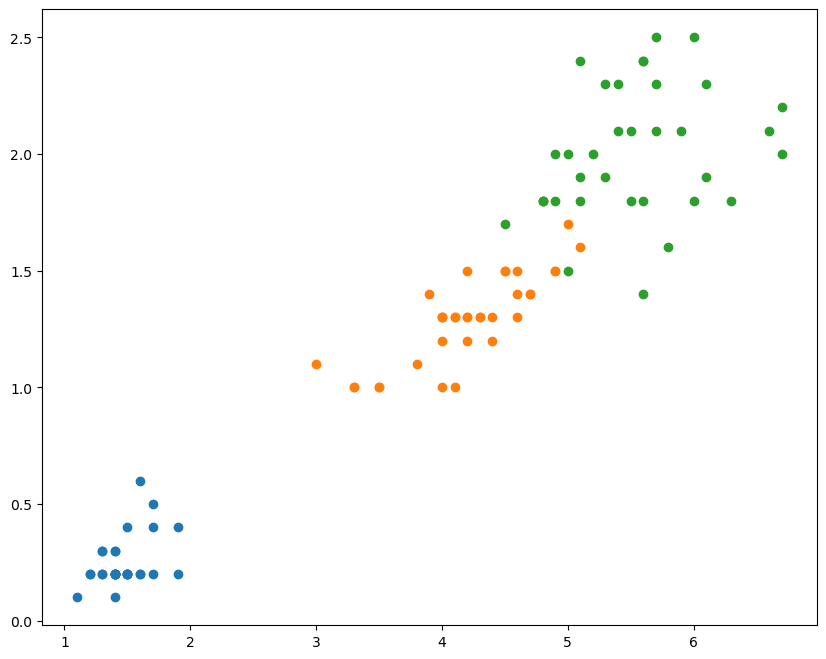

In [14]:
plt.figure(figsize=(10, 8))
for index, name in enumerate(iris.target_names):
    that_iris = X_train[y_train == index, :]
    plt.scatter(that_iris[:, 2], that_iris[:, 3])
plt.show()

In [15]:
from ipywidgets import interactive

In [16]:
def show_iris_2d(col1, col2):
    """Plots the iris dataset, only those features given by params col1 and col2.
    :param col1: index of fisrt feature to show, 0 to 3
    :param col2: index of second feature to show, 0 to 3
    :return: None
    """
    plt.figure(figsize=(10, 8))
    names = iris.target_names
    for index, name in enumerate(iris.target_names):
        that_iris = X_train[y_train == index, :]
        plt.scatter(that_iris[:, col1], that_iris[:, col2])
        plt.xlabel(names[col1])
        plt.ylabel(names[col2])
    plt.show()
    
interactive(show_iris_2d, col1=(0, 3), col2=(0, 3))

interactive(children=(IntSlider(value=1, description='col1', max=3), IntSlider(value=1, description='col2', ma…

Pasii de lucru sunt:
1. Importa clasa utilizata

In [17]:
from sklearn.neighbors import KNeighborsClassifier

2. Instantiaza modelul: obtine un obiect pe baza clasei

In [18]:
model = KNeighborsClassifier(n_neighbors=1)

3. Antreneaza modelul, specificandu-i datele din setul de antrenare. In cazul nostr, acestea sunt X_train si y_train. 

In [19]:
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

4. Testeaza modelul pe date - din setul de test sau alta sursa

In [20]:
X_train[0, :], y_train[0]

(array([5.7, 2.9, 4.2, 1.3]), 1)

In [21]:
#prezicere pentru o singura masuratoare (4 valori)
to_predict = np.array([5.5, 2.8, 4.3, 1.0]).reshape(1, -1)
model.predict(to_predict)

array([1])

In [22]:
y_hat = model.predict(X_test)
print(y_hat)
print(y_test)

print(f'Cate diferente sunt intre clasele rezise si cele estimate: {sum(y_hat != y_test)}')

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 1 2 1 2]
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 2 2 1 2]
Cate diferente sunt intre clasele orezise si cele estimate: 1


Putem experimenta cu diferite valori ale lui $k$:

In [ ]:
model_5 = KNeighborsClassifier(n_neighbors=5)
model_5.fit(X_train, y_train)
y_hat_5 = model_5.predict(X_test)
print(sum(y_hat_5 != y_hat))

## Regresia logistica

Prezentare teoretica:  [curs Inteligenta Artificiala](https://github.com/lmsasu/cursuri/blob/master/InteligentaArtificiala/curs/InteligentaArtificiala.pdf)

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='sag', multi_class='multinomial', max_iter=10000)
logreg.fit(X_train, y_train)
y_hat_logreg = logreg.predict(X_test)

In [ ]:
#acuratetea
sum(y_hat_logreg != y_test)

## Bibliografie:
1. k-NN: [Articol Scholarpedia](http://www.scholarpedia.org/article/K-nearest_neighbor)
1. k-NN: [A Complete Guide to K-Nearest-Neighbors with Applications in Python and R](https://kevinzakka.github.io/2016/07/13/k-nearest-neighbor/)
1. Scikit-learn si k-NN: [scikit-learn video #3: Machine learning first steps with the Iris dataset](http://blog.kaggle.com/2015/04/22/scikit-learn-video-3-machine-learning-first-steps-with-the-iris-dataset/)
1. Case based reasoning: Beatriz López, [Case-Based Reasoning: A Concise Introduction](http://www.morganclaypool.com/doi/abs/10.2200/S00490ED1V01Y201303AIM020), Morgan & Claypool Publishers, 2003